In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline

plt.style.use('fivethirtyeight')


import nltk
from nltk.corpus import wordnet as wn

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [2]:
p = Path('.')
df_r = pd.read_csv(p / 'preprocessed_meta_data_last.csv', index_col=0, 
            dtype={'imdbId':'str','tmdbId':'str'})

In [3]:
df_r.head(2).T

,0,1
tmdbID,862,8844
original_language,en,en
original_title,Toy Story,Jumanji
popularity,21.946943,17.015539
runtime,81.0,104.0
spoken_languages,1,2
status,Released,Released
vote_average,7.7,6.9
vote_count,5415.0,2413.0
imdbId,0114709,0113497


In [169]:
df_r.nunique()

tmdbID                       45413
original_language               46
original_title               43354
popularity                   43745
runtime                        353
spoken_languages                14
status                           6
vote_average                    92
vote_count                    1820
imdbId                       45413
genres_tmdb                   4063
genres_tmdb_complexity           9
collection                    1694
n_production_companies          26
main_production_companies      373
n_production_countries          15
main_production_countries       73
year                           135
month                           12
budget                        2625
gross_world                  19424
incomes                       9879
movieId                      45337
tmdbId                       45337
rating                       12969
actor_1_name                 18368
actor_2_name                 22377
actor_3_name                 24493
actor_1_gender      

In [170]:
df_r.isnull().sum()

tmdbID                           0
original_language                0
original_title                   0
popularity                       0
runtime                        255
spoken_languages                 0
status                          81
vote_average                     0
vote_count                       0
imdbId                           0
genres_tmdb                   2438
genres_tmdb_complexity           0
collection                       0
n_production_companies           0
main_production_companies    11887
n_production_countries           0
main_production_countries     6283
year                            11
month                           11
budget                       29849
gross_world                  25774
incomes                      35594
movieId                         76
tmdbId                          76
rating                         615
actor_1_name                  2416
actor_2_name                  3745
actor_3_name                  4657
actor_1_gender      

In [5]:
df = df_r.copy()

/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

<AxesSubplot:xlabel='actor_3_nominat', ylabel='Density'>

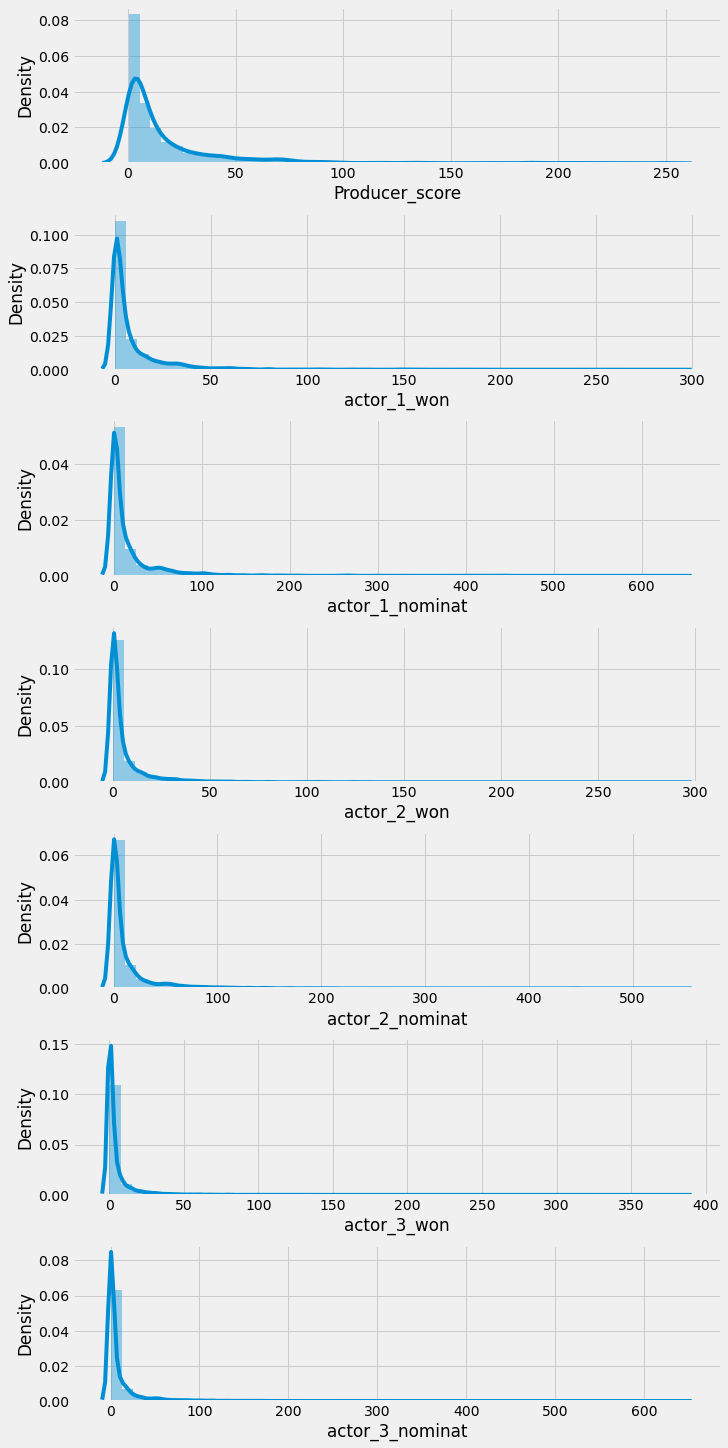

In [6]:
fig, ax = plt.subplots(7, figsize=(10,20), constrained_layout=True, clear=True)
sns.distplot(df['Producer_score'], ax=ax[0])
sns.distplot(df['actor_1_won'], ax=ax[1])
sns.distplot(df['actor_1_nominat'], ax=ax[2])
sns.distplot(df['actor_2_won'], ax=ax[3])
sns.distplot(df['actor_2_nominat'], ax=ax[4])
sns.distplot(df['actor_3_won'], ax=ax[5])
sns.distplot(df['actor_3_nominat'], ax=ax[6])


/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

<AxesSubplot:xlabel='incomes', ylabel='Density'>

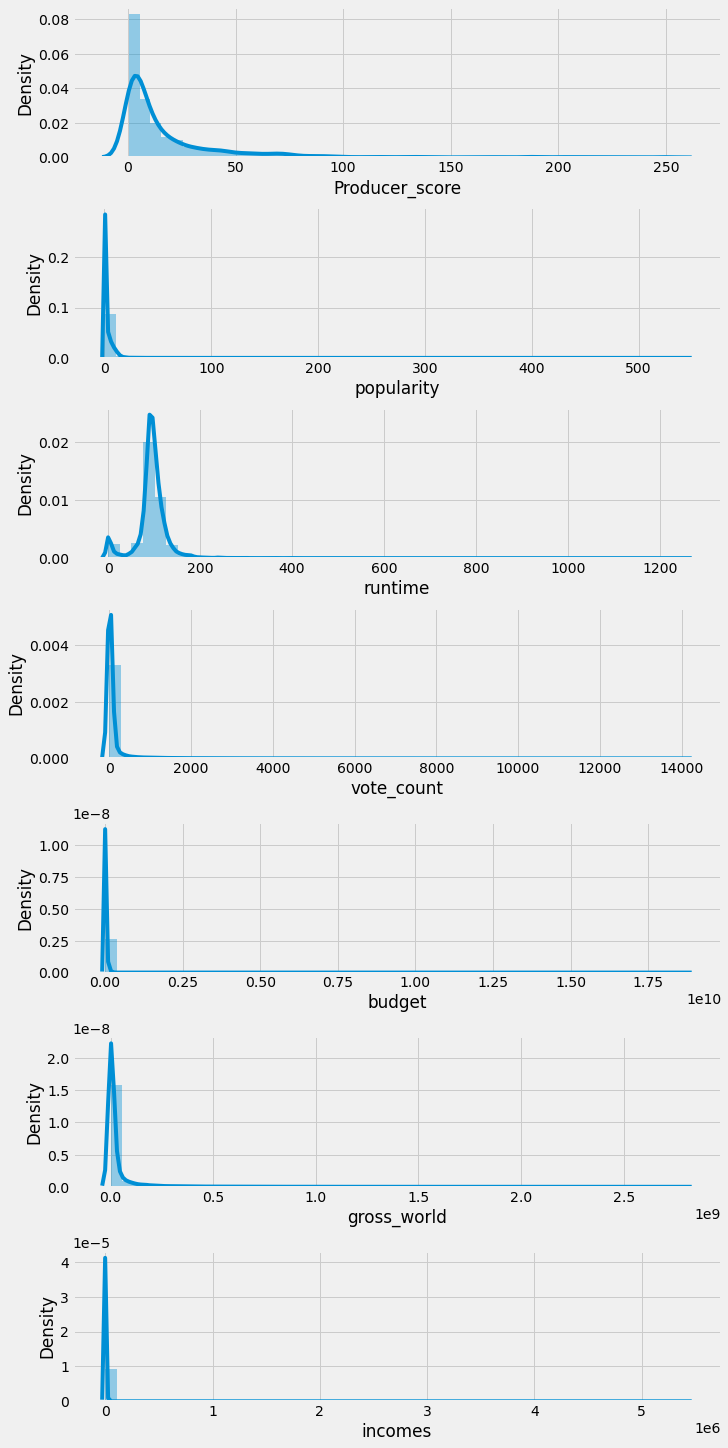

In [7]:
fig, ax = plt.subplots(7, figsize=(10,20), constrained_layout=True, clear=True)
sns.distplot(df['Producer_score'], ax=ax[0])
sns.distplot(df['popularity'], ax=ax[1])
sns.distplot(df['runtime'], ax=ax[2])
sns.distplot(df['vote_count'], ax=ax[3])
sns.distplot(df['budget'], ax=ax[4])
sns.distplot(df['gross_world'], ax=ax[5])
sns.distplot(df['incomes'], ax=ax[6])


<AxesSubplot:xlabel='rating', ylabel='Producer_score'>

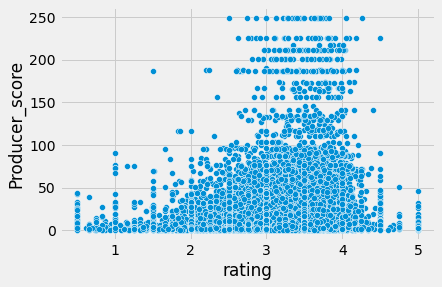

In [8]:
sns.scatterplot(y=df['Producer_score'],x=df['rating'])

In [115]:
pd.options.display.float_format = '{:.3f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tmdbID,59339.000,116054.167,111260.903,2.000,32741.000,77221.000,160019.000,469172.000
popularity,59339.000,2.413,5.364,0.000,0.266,0.896,2.535,547.488
runtime,58904.000,90.745,39.460,0.000,84.000,93.000,105.000,1256.000
spoken_languages,59339.000,1.108,0.786,0.000,1.000,1.000,1.000,19.000
vote_average,59339.000,5.391,2.212,0.000,4.800,6.000,6.800,10.000
vote_count,59339.000,85.962,432.299,0.000,2.000,7.000,25.000,14075.000
genres_tmdb_complexity,59339.000,1.971,1.129,0.000,1.000,2.000,3.000,8.000
n_production_companies,59339.000,1.391,1.656,0.000,0.000,1.000,2.000,26.000
n_production_countries,59339.000,1.015,0.774,0.000,1.000,1.000,1.000,25.000
year,59148.000,1993.638,22.586,1874.000,1983.000,2002.000,2011.000,2020.000


## 장르 re-tag를 위해서!

In [9]:
genres_sep = df['genres_tmdb'].apply(lambda x: x.split('|') if isinstance(x, str) else 0).apply(lambda x:pd.Series(x))

In [10]:
w_genres = genres_sep[1].sort_values().unique()

In [11]:
genre_tag = nltk.pos_tag(w_genres[:-1]) # nan 빼고
genre_tag

[('Action', 'NNP'),
 ('Adventure', 'NNP'),
 ('Animation', 'NNP'),
 ('Comedy', 'NNP'),
 ('Crime', 'NNP'),
 ('Documentary', 'NNP'),
 ('Drama', 'NNP'),
 ('Family', 'NNP'),
 ('Fantasy', 'NNP'),
 ('Foreign', 'NNP'),
 ('History', 'NNP'),
 ('Horror', 'NNP'),
 ('Music', 'NNP'),
 ('Mystery', 'NNP'),
 ('Romance', 'NNP'),
 ('Science Fiction', 'NNP'),
 ('TV Movie', 'NNP'),
 ('Thriller', 'NNP'),
 ('War', 'NNP'),
 ('Western', 'NNP')]

In [12]:
genre_mapping= {'Action': 'action.n.02'
                ,'Adventure': 'adventure.n.01'
                ,'Animation' : 'animation.n.05'
                ,'Comedy' : 'comedy.n.01'
                ,'Crime' : 'crime.n.01'
                , 'Documentary' : 'documentary.n.01'
                , 'Drama' : 'drama.n.02'
                , 'Family': 'family.n.01'
                , 'Fantasy': 'fantasy.n.01'
                , 'Foreign': 'foreign.a.02'
                , 'History': 'history.n.02'
                , 'Horror': 'horror.n.01'
                , 'Music': 'music.n.01'
                , 'Mystery': 'mystery.n.02'
                , 'Romance': 'romance.n.05'
                , 'Science Fiction': 'science.n.01' # 단어 목록에 없어서 임의로 science 할당, 어쨌든 뜻은 유사하니까?
                , 'TV Movie': 'movie.n.01' # 여기도 마찬가지
                , 'Thriller': 'thriller.n.01'
                , 'War': 'war.n.01'
                , 'Western': 'western.n.01'
               }

In [13]:
# 단어 동의어 중 올바른것 선택해서 mapping 해주었음
for g in genre_tag:
    print(g)
    for i in wn.synsets(g[0]):
        print(i,i.definition())
    print('\n')

('Action', 'NNP')
Synset('action.n.01') something done (usually as opposed to something said)
Synset('action.n.02') the state of being active
Synset('military_action.n.01') a military engagement
Synset('natural_process.n.01') a process existing in or produced by nature (rather than by the intent of human beings)
Synset('action.n.05') the series of events that form a plot
Synset('action.n.06') the trait of being active and energetic and forceful
Synset('action.n.07') the operating part that transmits power to a mechanism
Synset('legal_action.n.01') a judicial proceeding brought by one party against another; one party prosecutes another for a wrong done or for protection of a right or for prevention of a wrong
Synset('action.n.09') an act by a government body or supranational organization
Synset('action.n.10') the most important or interesting work or activity in a specific area or field
Synset('action.v.01') institute legal proceedings against; file a suit against
Synset('carry_through.

In [16]:
genrelist = df['genres_tmdb'][0].split('|')
[x for x in genrelist if genrelist[0]!= x]

['Comedy', 'Family']

In [15]:
def genre_similarity(x):
    
    try :
        genre_list = x.split('|')
    except : # 장르가 nan인 데이터
        return np.nan, np.nan
    
    if len(genre_list) < 2: # 장르가 1개면 유사도는 1, 기본 장르만 return
        return 1, str(genre_list[0])
    
    tmp_min = None
    cnt = 0

    for x in genre_list:

        for sub in [xx for xx in genre_list if xx!=x]:
            g_1 = wn.synset(genre_mapping[x])
            # 두 장르 간 유사도
            sim_value = g_1.path_similarity(wn.synset(genre_mapping[sub]))

            if cnt == 0: # 첫번째는 그냥 할당
                tmp_min = g_1.path_similarity(wn.synset(genre_mapping[sub]))
                val_1 = x
                val_2 = sub

            elif tmp_min > sim_value: # 다음 유사도가 더 작으면
                
                tmp_min = g_1.path_similarity(wn.synset(genre_mapping[sub]))
                # 현재 비교 중인 장르로 교환
                val_1 = x
                val_2 = sub
                
            else : # 유사도가 더 작지 않으면 첫 번째 유사도 유지
                tmp_min = tmp_min

    for n,i in enumerate(sorted([val_1, val_2])):
        if n < 1:
            ss = i
        else :
            ss = ss+'|'+i

    return tmp_min, ss

In [17]:
df['genres_tmdb']

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
45514                Drama|Family
45515                       Drama
45516       Action|Drama|Thriller
45517                         NaN
45518                         NaN
Name: genres_tmdb, Length: 45519, dtype: object

#### 장르 2개 조합을 통해 카디널리티를 많이 줄임

In [19]:
print(df['main_production_companies'].isnull().sum())
print(df['main_production_companies'].nunique())

11887
373


In [21]:
pp = df['main_production_companies'].value_counts().reset_index()
pp[pp['main_production_companies']>10]

,index,main_production_companies
0,etc,17931
1,Paramount Pictures,1002
2,Metro-Goldwyn-Mayer (MGM),854
3,Twentieth Century Fox Film Corporation,780
4,Warner Bros.,757
...,...,...
368,Paramount Vantage,11
369,Irish Film Board,11
370,Woodfall Film Productions,11
371,"RKO Radio Pictures, Inc.",11


In [22]:
df = df_r.copy()

def engineer_fin(df):
    
    # target rating 결측 제거
    df = df[~df['rating'].isnull()]
    
    # runtime mean imputation
    df.loc[df['runtime']==0,'runtime'] = df.runtime.mean()
    df.loc[df['runtime'].isnull(),'runtime'] = df.runtime.mean()
    
    # 감독 스코어 결측은 mean으로 채우지 않고 0으로 채움
    df.loc[df['Producer_score'].isnull(),'Producer_score'] = 0

    # 지나치게 긴 runtime은 outlier 로 제거
    df = df[~(df['runtime'] > np.nanpercentile(df['runtime'], 99.9))]
    
    # popularity & vote count 의 극단치는 의미가 있음 로그 변환만해줌
    df['popularity'] = np.log1p(df['popularity'].astype(float))
    # vote count 0는 말 그대로 0
    df['vote_count'] = np.log1p(df['vote_count'].astype(float))
    
    
    # incomes 환율때문에 생기는 극단적인 값 제거
    df = df[~(df['incomes'] > np.nanpercentile(df['incomes'], 99.9))]
    
    # incomes. budget, gross_world는 mean impute하면 극단치에 지나치게 영향을 받기 때문에
    # 분포의 97.5 percentile 의 최빈값으로 impute
    # 물론 1만개 데이터로 나머지 3만개를 채우는게 좀 그렇긴 한데..
    df.loc[df['incomes'].isnull(), 'incomes'] = df[(df['incomes'] < np.nanpercentile(df['incomes'], 97.5))]['incomes'].mode().values[0]
    df.loc[df['budget'].isnull(), 'budget'] = df[(df['budget'] < np.nanpercentile(df['budget'], 97.5))]['budget'].mode().values[0]
    df.loc[df['gross_world'].isnull(), 'gross_world'] = df[(df['gross_world'] < np.nanpercentile(df['gross_world'], 97.5))]['gross_world'].mode().values[0]
    
    # 돈관련 로그 변환
    df['incomes'] = np.log1p(df['incomes'].astype(float))
    df['budget'] = np.log1p(df['budget'].astype(float))
    df['gross_world'] = np.log1p(df['gross_world'].astype(float))
    
    
    # 장르 re tag
    df[['genre_similarity','genre_by_similar']] = ( df['genres_tmdb']
                                               .apply(genre_similarity)
                                               .apply(lambda x: pd.Series(x)) )
    
    # 1-3 주연까지 gender 구성을 feature로 만듬
    df['gender_ratio'] = df[['actor_1_gender','actor_2_gender','actor_3_gender']].sum(axis=1)
    
    return df

df_p = engineer_fin(df)

/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [193]:
def engineer_second(df):
    
    # 수상 카운트 결측은 내역이 없는것
    df.loc[df['actor_1_won'].isnull(),'actor_1_won']=0
    df.loc[df['actor_2_won'].isnull(),'actor_2_won']=0
    df.loc[df['actor_3_won'].isnull(),'actor_3_won']=0
    df.loc[df['actor_1_nominat'].isnull(),'actor_1_nominat']=0
    df.loc[df['actor_2_nominat'].isnull(),'actor_2_nominat']=0
    df.loc[df['actor_3_nominat'].isnull(),'actor_3_nominat']=0
    
    df['actor_1_score'] = df['actor_1_won'] + (df['actor_1_nominat']*0.5)
    df['actor_2_score'] = df['actor_2_won'] + (df['actor_2_nominat']*0.5)
    df['actor_3_score'] = df['actor_3_won'] + (df['actor_3_nominat']*0.5)
    
    # imputer 여기서 적용
    awards = ['actor_1_won','actor_2_won','actor_3_won'
             ,'actor_1_nominat','actor_2_nominat','actor_3_nominat'
             ,'actor_1_score','actor_2_score','actor_3_score']
    
#     iterimput_ = IterativeImputer()
#     t = iterimput_.fit_transform(df[awards])
#     t_df = pd.DataFrame(t, columns=awards, index=df.index).add_prefix('imputed_')
    
#     df = pd.concat([df,t_df],axis=1)
    
    iterimput_ = SimpleImputer()
    t = iterimput_.fit_transform(df[awards])
    t_df = pd.DataFrame(t, columns=awards, index=df.index).add_prefix('imputed_')
    
    df = pd.concat([df,t_df],axis=1)
    
    
    genre_ = ['genre_similarity']
    simpleimput_ = SimpleImputer()
    t = simpleimput_.fit_transform(df[genre_])
    t_df = pd.DataFrame(t, columns=genre_, index=df.index).add_prefix('imputed_')
    df = pd.concat([df,t_df],axis=1)
    
    df['actor_power'] = df[['actor_1_score','actor_2_score','actor_3_score']].mean(axis=1)
    # unique & non feature columns 제거
    cols = ['tmdbID'
            , 'original_title'
            , 'imdbId'
            , 'movieId'
            , 'tmdbId'
            , 'vote_average' # data leakage 유력후보 제거
            , 'month'
#             , 'vote_count' # 생각해볼 필요가..
            , 'genres_tmdb'
            , 'n_production_companies'
            , 'n_production_countries'
            , 'spoken_languages'
            , 'actor_1_gender', 'actor_2_gender', 'actor_3_gender'
            , 'status'
            , 'actor_1_won', 'actor_1_nominat', 'actor_2_won'
            , 'actor_2_nominat', 'actor_3_won', 'actor_3_nominat'
            ,'imputed_actor_1_won'	
            ,'imputed_actor_2_won'	
            ,'imputed_actor_3_won'	
            ,'imputed_actor_1_nominat'
            ,'imputed_actor_2_nominat'	
            ,'imputed_actor_3_nominat'	
            ,'imputed_actor_1_score'	
            ,'imputed_actor_2_score'	
            ,'imputed_actor_3_score'
            ,'genre_similarity'
           ]
    df = df.drop(columns=cols)
     
    return df

In [201]:
df = df_p.copy()
df = engineer_second(df)

In [230]:
df.head(4).T

,0,1,2,3
original_language,en,en,en,en
popularity,3.133,2.891,2.543,1.581
runtime,81.0,104.0,101.0,127.0
vote_count,8.597,7.789,4.533,3.555
genres_tmdb_complexity,3,3,2,3
collection,Toy Story Collection,none_collection,Grumpy Old Men Collection,none_collection
main_production_companies,Pixar Animation Studios,TriStar Pictures,Warner Bros.,Twentieth Century Fox Film Corporation
main_production_countries,United States of America,United States of America,United States of America,United States of America
year,1995.0,1995.0,1995.0,1995.0
budget,17.217,17.99,17.034,16.588


In [234]:
df[['year','rating']].groupby('year').mean()

,rating
year,
1874.000,2.550
1878.000,2.929
1883.000,2.300
1887.000,1.778
1888.000,1.577
...,...
2015.000,3.094
2016.000,3.110
2017.000,3.001


# 발표자료 simple 시각화

<AxesSubplot:xlabel='year', ylabel='Count'>

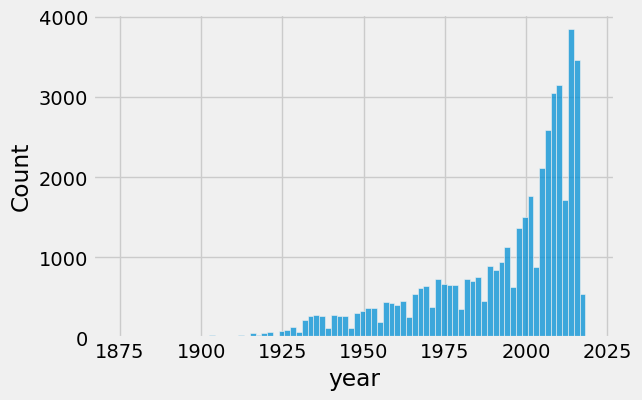

In [252]:
plt.rcParams['figure.dpi'] = 100
sns.histplot(df['year'])

<AxesSubplot:xlabel='year', ylabel='rating'>

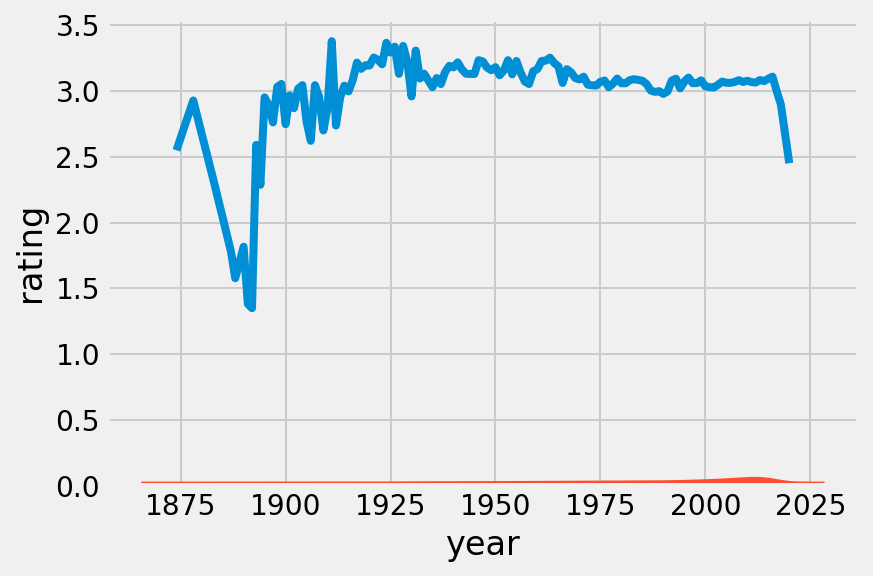

In [242]:

sns.lineplot(df[['year','rating']].groupby('year').mean().index,
            df[['year','rating']].groupby('year').mean()['rating'])
sns.distplot(df['year'])

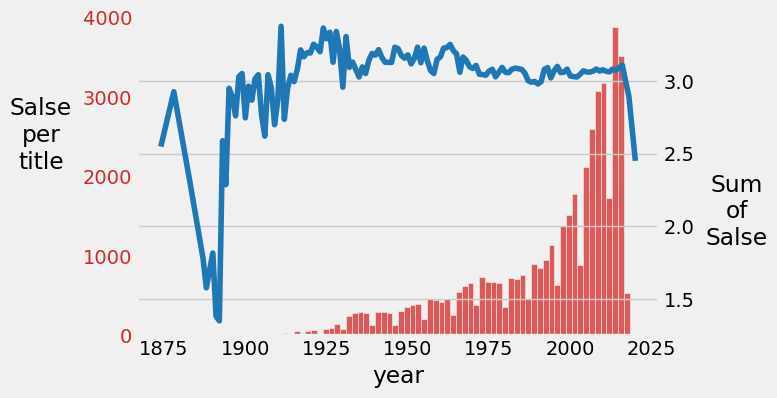

In [258]:
fig, ax = plt.subplots()
ax2 = ax.twinx() # 축 따로 쓰는 방법
sns.lineplot(df_r[['year','rating']].groupby('year').mean().index,
            df_r[['year','rating']].groupby('year').mean()['rating'], ax=ax2, color='tab:blue')
sns.histplot(df_r['year'], ax=ax, color='tab:red')
# sns.lineplot(data=df_plt,x='Year',y='Sales per titles', ax=ax, color='tab:red')
ax.grid(False)

ax.set_ylabel('Salse\nper\ntitle',rotation=0)
ax.yaxis.labelpad = 30
ax.tick_params(axis='y',labelcolor='tab:red')

ax2.set_ylabel('Sum\nof\nSalse',rotation=0)
ax2.yaxis.labelpad = 30
ax2.tick_params(axis='x',labelcolor='tab:blue')

# fig.savefig('sales_per_titles.jpg',dpi=100)
fig.savefig('sales.png', bbox_inches='tight', pad_inches=0)

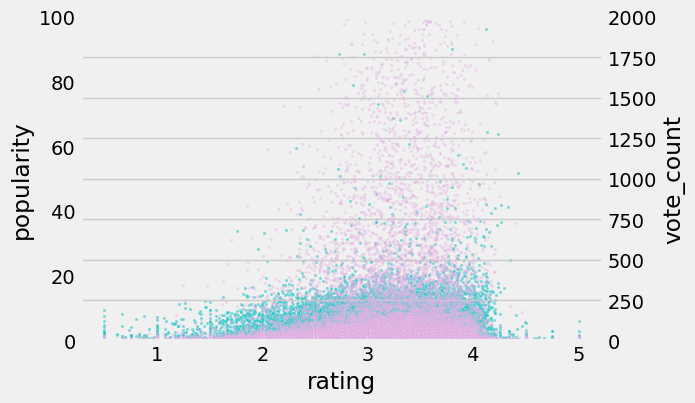

In [287]:
fig, ax = plt.subplots()
ax.grid(False)
ax2 = ax.twinx() # 축 따로 쓰는 방법

sns.scatterplot(df_r['rating'],df_r['popularity'], s=5, ax=ax, color='c', alpha=0.5)
sns.scatterplot(df_r['rating'],df_r['vote_count'], s=5, ax=ax2, color='plum', alpha=0.3)
ax.set_ylim(0,100)
ax2.set_ylim(0,2000)
fig.savefig('plumis_count.png', bbox_inches='tight', pad_inches=0,dpi=100)

# 모델 만들기

In [203]:
def split_X_y(x, target):
  y = x[target]
  x = x.drop(columns=[target]) 
  return x, y
  
def printshape(*args):
  [print(i.shape) for i in args]

train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)
train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=42)

target = 'rating'

# train = engineer(train)
# val = engineer(val)
# test = engineer(test)

X_train, y_train = split_X_y(train, target)
X_val, y_val = split_X_y(val, target)
X_test, y_test = split_X_y(test, target)
printshape(X_train, y_train, X_val, y_val, X_test, y_test)

(28703, 25)
(28703,)
(7176, 25)
(7176,)
(8970, 25)
(8970,)


In [138]:
from sklearn.metrics import mean_squared_log_error
# baseline model
predict = y_train.mean()
y_pred = [predict] * len(y_train)

msle = mean_squared_log_error(y_train, y_pred)**0.5
mae = mean_absolute_error(y_train, y_pred)
print(f'baseline MSLE:{msle}, MAE: {mae}')


baseline MSLE:0.19602172411429056, MAE: 0.5212622024460776


In [14]:
# pipe = make_pipeline(
#                     OrdinalEncoder(),
#                     SimpleImputer(),
#                     RandomForestRegressor(n_jobs=-1, 
#                                             random_state=42,
#                                             oob_score=True
#                                           , max_depth=15
#                                          )
# )

# pipe.fit(X_train, y_train)
# print(f'train set : {pipe.score(X_train,y_train)}')
# print(f'val set : {pipe.score(X_val,y_val)}')




train set : 0.5302288293059985
val set : 0.14764945342015978


ValueError: could not convert string to float: 'zh'

## RandomForest

In [227]:
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
from category_encoders import TargetEncoder

pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(min_samples_leaf= 38
                                                 ,smoothing= 2.0)
                                    ,SimpleImputer()
                                   )),
    ('rf', RandomForestRegressor(n_jobs=-1
                                , random_state=42
                                , oob_score=True
                                , max_depth=20
                                 , max_features=0.9782948245641648
                                 , n_estimators=1000
                                 , min_samples_leaf=17
                                 )) ]
)

pipe.fit(X_train, y_train)
print(f'train set : {pipe.score(X_train,y_train)}')
print(f'val set : {pipe.score(X_val,y_val)}')


X_val_tranformed = pipe.named_steps['preprocessing'].transform(X_val)
model = pipe.named_steps['rf']
y_pred = model.predict(X_val_tranformed)
msle = mean_squared_log_error(y_val, y_pred)**0.5
mae = mean_absolute_error(y_val, y_pred)
print(f'val MSLE:{msle}, MAE: {mae}')

# 최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 20, 
#               'randomforestregressor__max_features': 0.9782948245641648, 
#               'randomforestregressor__min_samples_leaf': 17, 
#               'randomforestregressor__n_estimators': 1000, 
#               'targetencoder__min_samples_leaf': 37, 
#               'targetencoder__smoothing': 2.0}
# MAE:  0.43327076899968264
    
#     train set : 0.5709576713497158
# val set : 0.24459189058545094
# val MSLE:0.1760301762308585, MAE: 0.4336166054139009

train set : 0.4268344503465674
val set : 0.2377458244127384
val MSLE:0.1767629516366001, MAE: 0.4353897006365


### 랜덤 포레스트 최종 튜닝후 test score

In [228]:
# 최종 test set 스코어
X_test_tranformed = pipe.named_steps['preprocessing'].transform(X_test)
print(f'test set : {pipe.score(X_test,y_test)}')
y_pred = model.predict(X_test_tranformed)
msle = mean_squared_log_error(y_test, y_pred)**0.5
mae = mean_absolute_error(y_test, y_pred)
print(f'test MSLE:{msle}, MAE: {mae}')

test set : 0.2411830408894965
test MSLE:0.16632453205561193, MAE: 0.42370060879885113


In [44]:
pipe['preprocessing']

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['original_language', 'collection',
                                     'main_production_companies',
                                     'main_production_countries',
                                     'actor_1_name', 'actor_2_name',
                                     'actor_3_name', 'Producer',
                                     'genre_by_similar'],
                               min_samples_leaf=8, smoothing=20.0)),
                ('simpleimputer', SimpleImputer())])

## RF hyperparametor 튜닝

In [224]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 50),     
    'randomforestregressor__n_estimators': [50, 200, 500, 1000], 
    'randomforestregressor__max_depth': [5, 10, 15, 20], 
    'randomforestregressor__max_features': uniform(0, 1), # max_features
    'randomforestregressor__min_samples_leaf': randint(1, 50)
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=150, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=8
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 150 candidates, totalling 450 fits


In [225]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.9782948245641648, 'randomforestregressor__min_samples_leaf': 17, 'randomforestregressor__n_estimators': 1000, 'targetencoder__min_samples_leaf': 37, 'targetencoder__smoothing': 2.0}
MAE:  0.43327076899968264


## RF feature importance

actor_3_score               0.000
actor_3_name                0.000
actor_2_score               0.000
gender_ratio                0.000
genres_tmdb_complexity      0.000
actor_1_score               0.000
n_crew                      0.001
incomes                     0.001
imputed_genre_similarity    0.001
main_production_companies   0.001
collection                  0.001
actor_power                 0.001
actor_2_name                0.001
Producer                    0.002
popularity                  0.002
Producer_score              0.002
gross_world                 0.004
budget                      0.005
main_production_countries   0.006
original_language           0.006
actor_1_name                0.007
runtime                     0.010
year                        0.018
vote_count                  0.059
genre_by_similar            0.072
dtype: float64

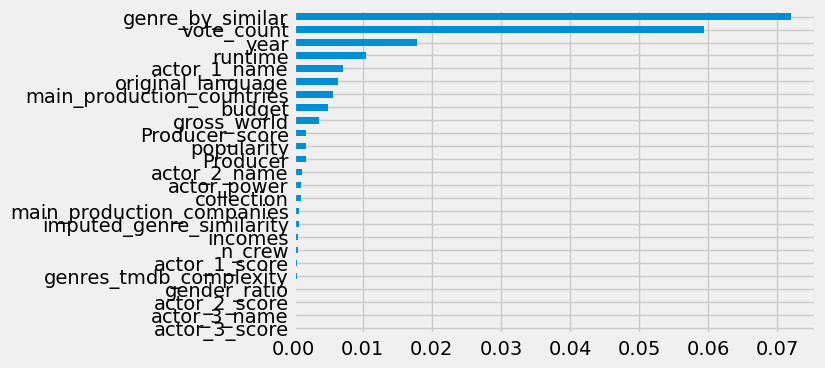

In [300]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # metric neg_mean_absolute_error neg_mean_squared_log_error
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=42
)
X_val_tranformed = pipe.named_steps['preprocessing'].transform(X_val)
permuter.fit(X_val_tranformed, y_val);

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values().plot.barh()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [310]:
feature_names = X_val.columns.tolist()
plt_df = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False).reset_index()
plt_df.rename({'index':'Feature',0:'value'}, axis=1, inplace=True)

In [311]:
plt_df

,Feature,value
0,genre_by_similar,0.072
1,vote_count,0.059
2,year,0.018
3,runtime,0.010
4,actor_1_name,0.007
5,original_language,0.006
6,main_production_countries,0.006
7,budget,0.005
8,gross_world,0.004
9,Producer_score,0.002


### feature importance 시각화

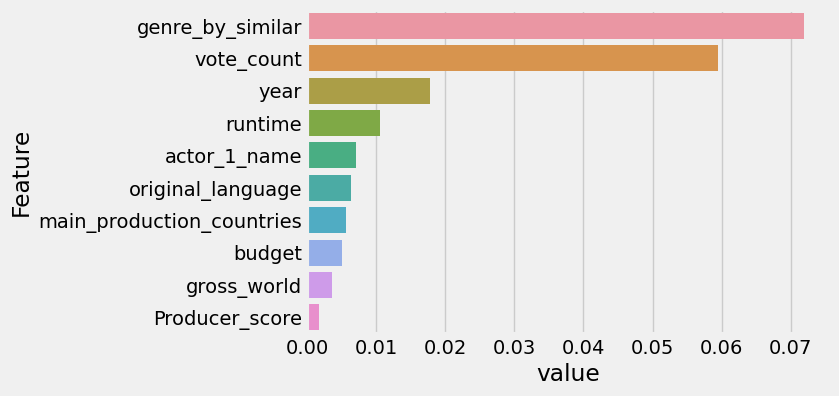

In [314]:
fig, ax = plt.subplots()
sns.barplot(plt_df[:10]['value'], plt_df[:10]['Feature'] , orient='h')
fig.savefig('featureimportance.png', bbox_inches='tight', pad_inches=0,dpi=100)

# 이하 XGB는 사용하지 않음, 튜닝 시간 부족..
## XGB

[0]	validation_0-rmsle:0.71095	validation_1-rmsle:0.71567
[1]	validation_0-rmsle:0.53024	validation_1-rmsle:0.53771
[2]	validation_0-rmsle:0.40956	validation_1-rmsle:0.42074
[3]	validation_0-rmsle:0.32629	validation_1-rmsle:0.34137
[4]	validation_0-rmsle:0.26771	validation_1-rmsle:0.28625
[5]	validation_0-rmsle:0.22691	validation_1-rmsle:0.25003
[6]	validation_0-rmsle:0.19855	validation_1-rmsle:0.22566
[7]	validation_0-rmsle:0.17919	validation_1-rmsle:0.20992
[8]	validation_0-rmsle:0.16633	validation_1-rmsle:0.20044
[9]	validation_0-rmsle:0.15779	validation_1-rmsle:0.19410
[10]	validation_0-rmsle:0.15205	validation_1-rmsle:0.18981
[11]	validation_0-rmsle:0.14850	validation_1-rmsle:0.18733
[12]	validation_0-rmsle:0.14597	validation_1-rmsle:0.18583
[13]	validation_0-rmsle:0.14424	validation_1-rmsle:0.18512
[14]	validation_0-rmsle:0.14294	validation_1-rmsle:0.18418
[15]	validation_0-rmsle:0.14209	validation_1-rmsle:0.18402
[16]	validation_0-rmsle:0.14150	validation_1-rmsle:0.18363
[17]	va

actor_3_score               -0.000005
main_production_countries    0.000077
genres_tmdb_complexity       0.000130
actor_1_score                0.000159
imputed_genre_similarity     0.000190
n_crew                       0.000418
actor_2_score                0.000457
gender_ratio                 0.000612
main_production_companies    0.000872
Producer_score               0.001167
incomes                      0.001331
actor_power                  0.001775
gross_world                  0.002181
original_language            0.002320
popularity                   0.002932
collection                   0.004194
actor_3_name                 0.005113
runtime                      0.006462
actor_2_name                 0.006852
year                         0.007627
budget                       0.008837
Producer                     0.020806
actor_1_name                 0.021416
genre_by_similar             0.038771
vote_count                   0.041530
dtype: float64

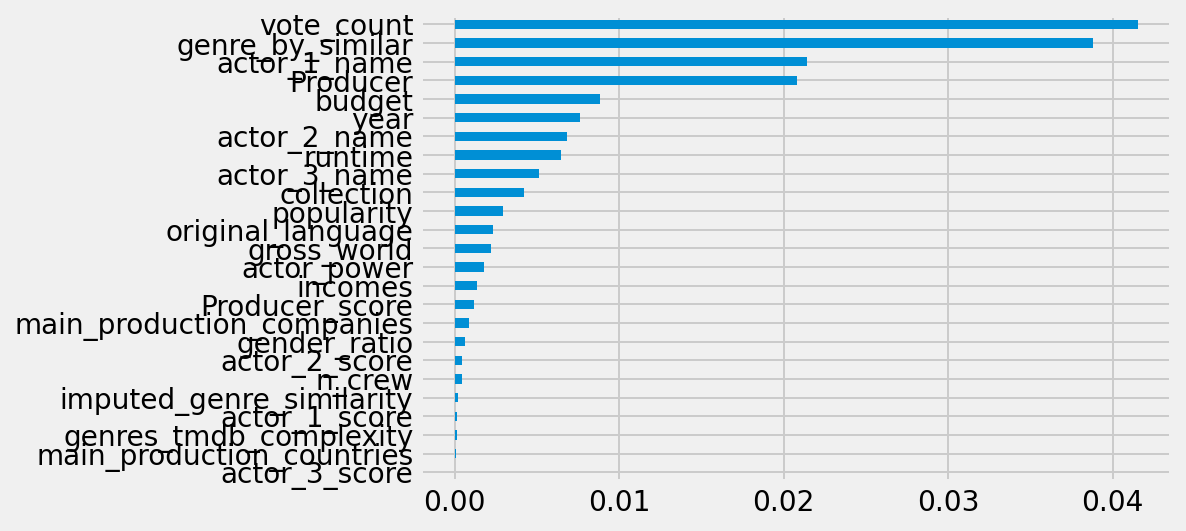

In [148]:
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

processor = make_pipeline(
    TargetEncoder(min_samples_leaf= 8, smoothing= 20.0), 
#     SimpleImputer(strategy='mean')
)

X_train_processed = processor.fit_transform(X_train, y_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]


boosting = XGBRegressor(n_estimators=100, 
                      verbosity=0, 
                      n_jobs=-1
                     ,learning_rate=0.2
                        , max_depth= 5
                        , max_features=0.56183
                        , min_samples_leaf=11
                     )

boosting.fit(X_train_processed, y_train, 
          eval_set=eval_set, 
          eval_metric='rmsle', 
          early_stopping_rounds=20)

# {'max_depth': 5,
#  'max_features': 0.5618138803383087,
#  'min_samples_leaf': 11,
#  'n_estimators': 100}

print(f'train set : {boosting.score(X_train_processed,y_train)}')
print(f'val set : {boosting.score(X_val_processed,y_val)}')


# X_val_tranformed = pipe.named_steps['preprocessing'].transform(X_val)
# model = pipe.named_steps['rf']
y_pred = boosting.predict(X_val_processed)
msle = mean_squared_log_error(y_val, y_pred)**0.5
mae = mean_absolute_error(y_val, y_pred)
print(f'val MSLE:{msle}, MAE: {mae}')

# permuter 정의
permuter = PermutationImportance(
    boosting, # model
    scoring='neg_mean_absolute_error', # metric neg_mean_absolute_error neg_mean_squared_log_error
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=42
)

permuter.fit(X_val_processed, y_val);

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values().plot.barh()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

### XGB hyperpaametor튜닝

In [222]:
pipe_boost = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    XGBRegressor(n_jobs=-1, verbosity=0, random_state=42)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.] # int로 넣으면 error(bug)
#     , 'targetencoder__min_samples_leaf': randint(1, 50)
    , 'XGBRegressor__n_estimators': [50, 200, 500, 1000] 
    , 'XGBRegressor__max_depth': [5, 10, 15, 20]
    , 'XGBRegressor__learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5]
    , 'XGBRegressor__min_child_weight' : [1, 5, 10, 20]
    , 'XGBRegressor__subsample': uniform(0, 1) # max_features
    , 'XGBRegressor__colsample_bytree': uniform(0, 1)
#     , 'XGBRegressor__reg_lambda': [0.1,0.5,1,5]
}

clf_XGB = RandomizedSearchCV(
    pipe_boost, 
    param_distributions=dists, 
    n_iter=100, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf_XGB.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


ValueError: Invalid parameter XGBRegressor for estimator Pipeline(steps=[('targetencoder', TargetEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, gamma=None, gpu_id=None,
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None,
                              random_state=42, reg_alpha=None, reg_lambda=None,
                              scale_pos_weight=None, subsample=None,
                              tree_method=None, validate_parameters=None,
                              verbosity=0))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [244]:
processor = make_pipeline(
    TargetEncoder(min_samples_leaf= 8,smoothing= 20.0), 
    SimpleImputer(strategy='mean')
)

X_train_processed = processor.fit_transform(X_train, y_train)
X_val_processed = processor.transform(X_val)

clf_boosting = XGBRegressor(n_jobs=-1
                        , verbosity=0
                       )

dists = {
    'n_estimators': [100,300,500,1000]
    , 'max_depth': [5, 10, 15, 20, None] 
    , 'max_features': uniform(0, 1) # max_features
    , 'min_samples_leaf': np.arange(1,50)
}

clf_XGB = RandomizedSearchCV(
    clf_boosting, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf_XGB.fit(X_train_processed, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/gray/Desktop/ai_local/.conda-env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
clf_XGB.best_params_

In [ ]:
clf_XGB.best_estimator_

In [250]:
y_pred = clf_XGB.predict(X_val_processed)
msle = mean_squared_log_error(y_val, y_pred)**0.5
mae = mean_absolute_error(y_val, y_pred)
print(f'val MSLE:{msle}, MAE: {mae}')

val MSLE:0.2143779947363519, MAE: 0.560367572494727


<AxesSubplot:ylabel='rating'>

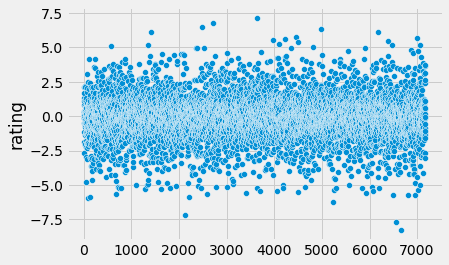

In [259]:
sns.scatterplot(np.arange(len(y_val)),(y_val-y_pred))
# sns.scatterplot(np.arange(len(y_val)),y_val)

## XGB CV


In [158]:
split_X_y(df,target)

(      original_language  popularity  runtime  spoken_languages    status  \
 0                    en       3.133   81.000                 1  Released   
 1                    en       2.891  104.000                 2  Released   
 2                    en       2.543  101.000                 1  Released   
 3                    en       1.581  127.000                 1  Released   
 4                    en       2.239  106.000                 1  Released   
 ...                 ...         ...      ...               ...       ...   
 45514                fa       0.070   90.000                 1  Released   
 45515                tl       0.164  360.000                 1  Released   
 45516                en       0.643   90.000                 1  Released   
 45517                en       0.003   87.000                 0  Released   
 45518                en       0.151   75.000                 1  Released   
 
        vote_count  genres_tmdb_complexity                      collection

In [215]:
train

,original_language,popularity,runtime,spoken_languages,genres_tmdb_complexity,collection,n_production_companies,main_production_companies,n_production_countries,main_production_countries,...,actor_3_name,n_crew,Producer,Producer_score,genre_similarity,genre_by_similar,gender_ratio,acotr_1_score,acotr_2_score,acotr_3_score
21423,en,0.023,94.311,0,0,none_collection,0,NaN,0,NaN,...,Eric Porter,0.000,NaN,0.000,NaN,NaN,5.000,6.500,2.000,3.000
14658,sv,2.241,147.000,1,4,The Millennium Collection,5,Nordisk Film,1,Sweden,...,Lena Endre,29.000,Jacob Groth,0.000,0.067,Crime|Mystery,4.000,5.000,27.000,0.500
30925,it,0.006,100.000,1,3,none_collection,0,NaN,0,NaN,...,Fernando Rey,1.000,NaN,0.000,0.071,Drama|Thriller,6.000,1.000,16.500,4.500
4002,en,1.607,107.000,1,3,none_collection,1,Columbia Pictures,1,United States of America,...,Isabelle Adjani,9.000,Elaine May,14.500,0.077,Adventure|Comedy,5.000,45.500,55.500,12.000
32476,en,0.701,87.000,1,4,none_collection,0,NaN,1,United States of America,...,Andrew Pleavin,4.000,Pearry Reginald Teo,4.000,0.067,Science Fiction|Thriller,6.000,2.000,8.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31231,en,1.804,90.000,1,4,none_collection,2,The Weinstein Company,1,United States of America,...,William Fichtner,41.000,Paul Haslinger,0.000,0.111,Crime|Drama,5.000,9.500,4.000,3.000
24928,en,0.585,86.000,1,3,none_collection,1,Metro-Goldwyn-Mayer (MGM),1,United States of America,...,Wallace Ford,2.000,Charles Brabin,0.000,0.077,Drama|Romance,5.000,6.500,1.000,1.500
23248,fr,3.027,112.000,2,2,none_collection,9,Canal Plus,2,France,...,André Dussollier,8.000,Christophe Gans,4.500,0.071,Fantasy|Romance,5.000,9.500,0.000,0.000
8621,cs,1.151,89.000,2,3,none_collection,1,Filmové Studio Barrandov,1,Czech Republic,...,Vlastimil Brodský,11.000,Carlo Ponti,0.000,0.143,Drama|War,4.000,0.000,1.000,0.000


In [216]:
import xgboost as xgb

train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=42)
X_train, y_train = split_X_y(train,target)
X_val, y_val = split_X_y(val,target)
# encoder setting
processor = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy='mean')
)

X_train_processed = processor.fit_transform(X_train, y_train)
X_val_processed = processor.transform(X_val)


hr_dmatrix = xgb.DMatrix(data=X_train_processed, label=y_train)

cv_params = {'objective':'reg:squarederror', 
             "n_estimators": 100, 
             "max_depth":5}

hr_cv = xgb.cv(dtrain=hr_dmatrix, 
               params=cv_params, 
               nfold=5, 
               num_boost_round=50, 
               metrics="rmsle", 
               as_pandas=True,
               seed=42,
               early_stopping_rounds=50)

# xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

hr_cv

,train-rmsle-mean,train-rmsle-std,test-rmsle-mean,test-rmsle-std
0,0.594,0.000,0.595,0.003
1,0.391,0.000,0.392,0.002
2,0.279,0.000,0.281,0.002
3,0.215,0.000,0.218,0.002
4,0.180,0.000,0.183,0.001
5,0.161,0.000,0.166,0.001
6,0.152,0.000,0.157,0.001
7,0.147,0.000,0.152,0.001
8,0.144,0.000,0.150,0.001
9,0.143,0.000,0.149,0.001


# 모델 분석
## PDP

In [98]:
from pdpbox.pdp import pdp_isolate, pdp_plot
plt.rcParams['figure.dpi'] = 144

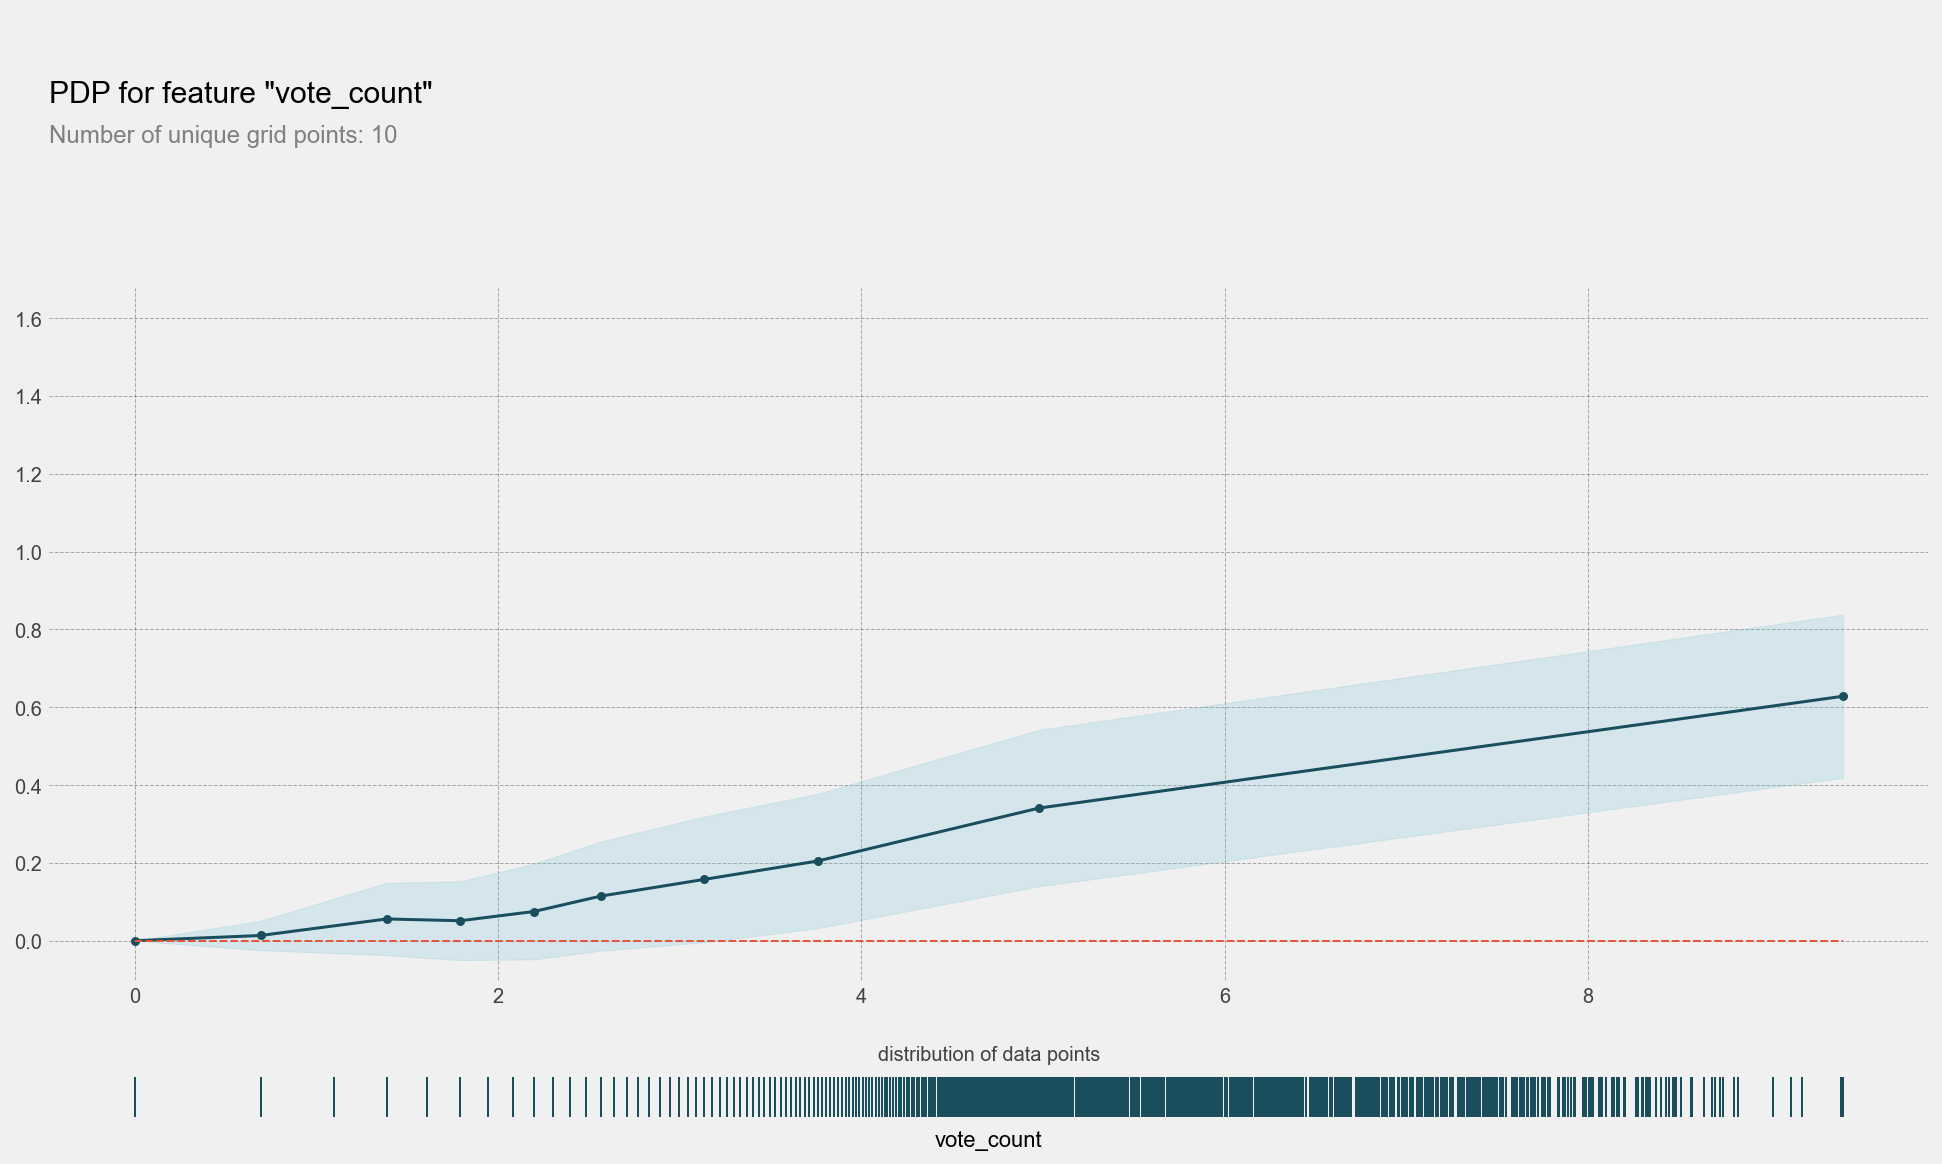

In [150]:
feature = 'vote_count'

isolated = pdp_isolate(
    model=boosting, 
    dataset=pd.DataFrame(X_val_processed, columns=X_val.columns, index=X_val.index), 
    model_features=pd.DataFrame(X_val_processed, columns=X_val.columns, index=X_val.index).columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated
         , feature_name=feature
#          , plot_lines=True # ICE plots
#          , frac_to_plot=100 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True);

In [151]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['popularity', 'vote_count']

interaction = pdp_interact(
    model=boosting, 
    dataset=pd.DataFrame(X_val_processed, columns=X_val.columns, index=X_val.index),
    model_features=pd.DataFrame(X_val_processed, columns=X_val.columns, index=X_val.index).columns, 
    features=features
)

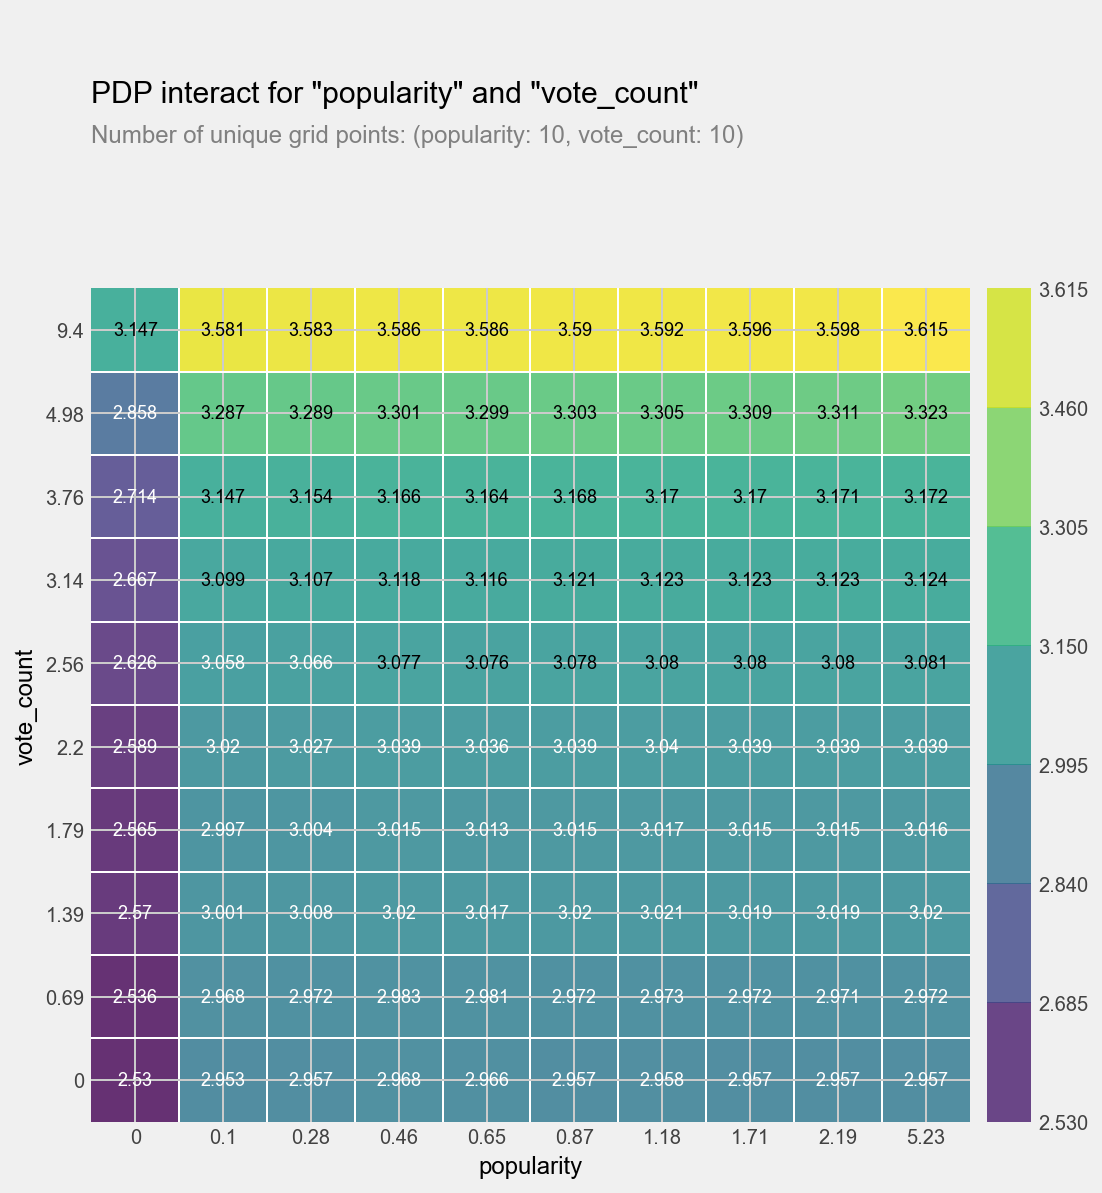

In [152]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [153]:
# 위에서 만든 2D PDP를 테이블로 변환(using Pandas, df.pivot_table)하여 사용합니다

pdp = interaction.pdp.pivot_table(
    values='preds', # interaction['preds']
    columns=features[0], 
    index=features[1]
    )[::-1] # 인덱스를 역순으로 만드는 slicing입니다
pdp

popularity,0.000000,0.104395,0.278629,0.458847,0.650490,0.867637,1.181169,1.710792,2.190924,5.226128
vote_count,,,,,,,,,,
9.402200,3.146805,3.580943,3.582764,3.586260,3.586442,3.590195,3.592444,3.596079,3.597542,3.614882
4.976734,2.858247,3.287314,3.289135,3.300548,3.298606,3.302844,3.305093,3.308756,3.310643,3.323431
3.761200,2.714229,3.146729,3.154157,3.165569,3.163873,3.168112,3.170361,3.169977,3.170826,3.171726
3.135494,2.666843,3.099343,3.106771,3.118183,3.116488,3.120726,3.122975,3.122591,3.123440,3.124341
2.564949,2.625902,3.058403,3.065830,3.077243,3.075547,3.078437,3.079993,3.079864,3.079701,3.080601
2.197225,2.588507,3.020244,3.027205,3.038617,3.036189,3.038896,3.040410,3.038690,3.038527,3.039427
1.791759,2.565058,2.996794,3.003755,3.015168,3.012740,3.015153,3.016680,3.014959,3.014796,3.015697
1.386294,2.569625,3.001361,3.008179,3.019685,3.017257,3.019670,3.021196,3.019476,3.019313,3.020213
0.693147,2.536055,2.967596,2.971706,2.983212,2.980913,2.971772,2.973299,2.971579,2.971416,2.972316


In [159]:

import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()

### category encoder tag를 다시 불러와도 카디널리티가 높아서 표시가 잘 되지 않음 

In [119]:
feature = 'genre_by_similar'
for item in encoder.ordinal_encoder.mapping: # target encoder의 작동은 ordinal부터 한 다음에 진행하기 때문에 이렇게 접근
    if item['col'] == feature:
        feature_mapping = item['mapping'] # Series

In [120]:
feature_mapping

NaN                           1
Crime|Mystery                 2
Drama|Thriller                3
Adventure|Comedy              4
Science Fiction|Thriller      5
                           ... 
Animation|War               204
Music|Mystery               205
Animation|Foreign           206
History|Science Fiction     207
Foreign|TV Movie            208
Length: 208, dtype: int64

In [127]:
feature = 'genre_by_similar'
isolated = pdp_isolate(
    model=model, 
    dataset=pd.DataFrame(X_val_tranformed, columns=X_val.columns, index=X_val.index), 
    model_features=pd.DataFrame(X_val_tranformed, columns=X_val.columns, index=X_val.index).columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)

In [129]:
category_names[:50]

['Crime|Mystery',
 'Drama|Thriller',
 'Adventure|Comedy',
 'Science Fiction|Thriller',
 'Animation|Family',
 'Drama|Family',
 'Comedy|Romance',
 'Animation',
 'Comedy',
 'Crime|Drama',
 'Horror|Science Fiction',
 'Drama|Foreign',
 'Romance|Science Fiction',
 'Drama',
 'Action|Romance',
 'Thriller|War',
 'Documentary',
 'Comedy|Fantasy',
 'Drama|Romance',
 'Documentary|Romance',
 'Drama|Science Fiction',
 'Family|Science Fiction',
 'Horror|Thriller',
 'Action|Western',
 'Western',
 'Crime|Thriller',
 'Comedy|Family',
 'Comedy|Drama',
 'Horror',
 'Documentary|Drama',
 'Action|Thriller',
 'Action',
 'Romance|TV Movie',
 'Action|Drama',
 'Action|Adventure',
 'Family|Fantasy',
 'Comedy|Crime',
 'Mystery|Thriller',
 'Action|Science Fiction',
 'Comedy|Horror',
 'Thriller',
 'Crime|Romance',
 'Drama|Music',
 'Action|Comedy',
 'Adventure|Animation',
 'Drama|History',
 'Comedy|Science Fiction',
 'Action|Animation',
 'Action|War',
 'Animation|Science Fiction']

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='genre_by_similar'>})

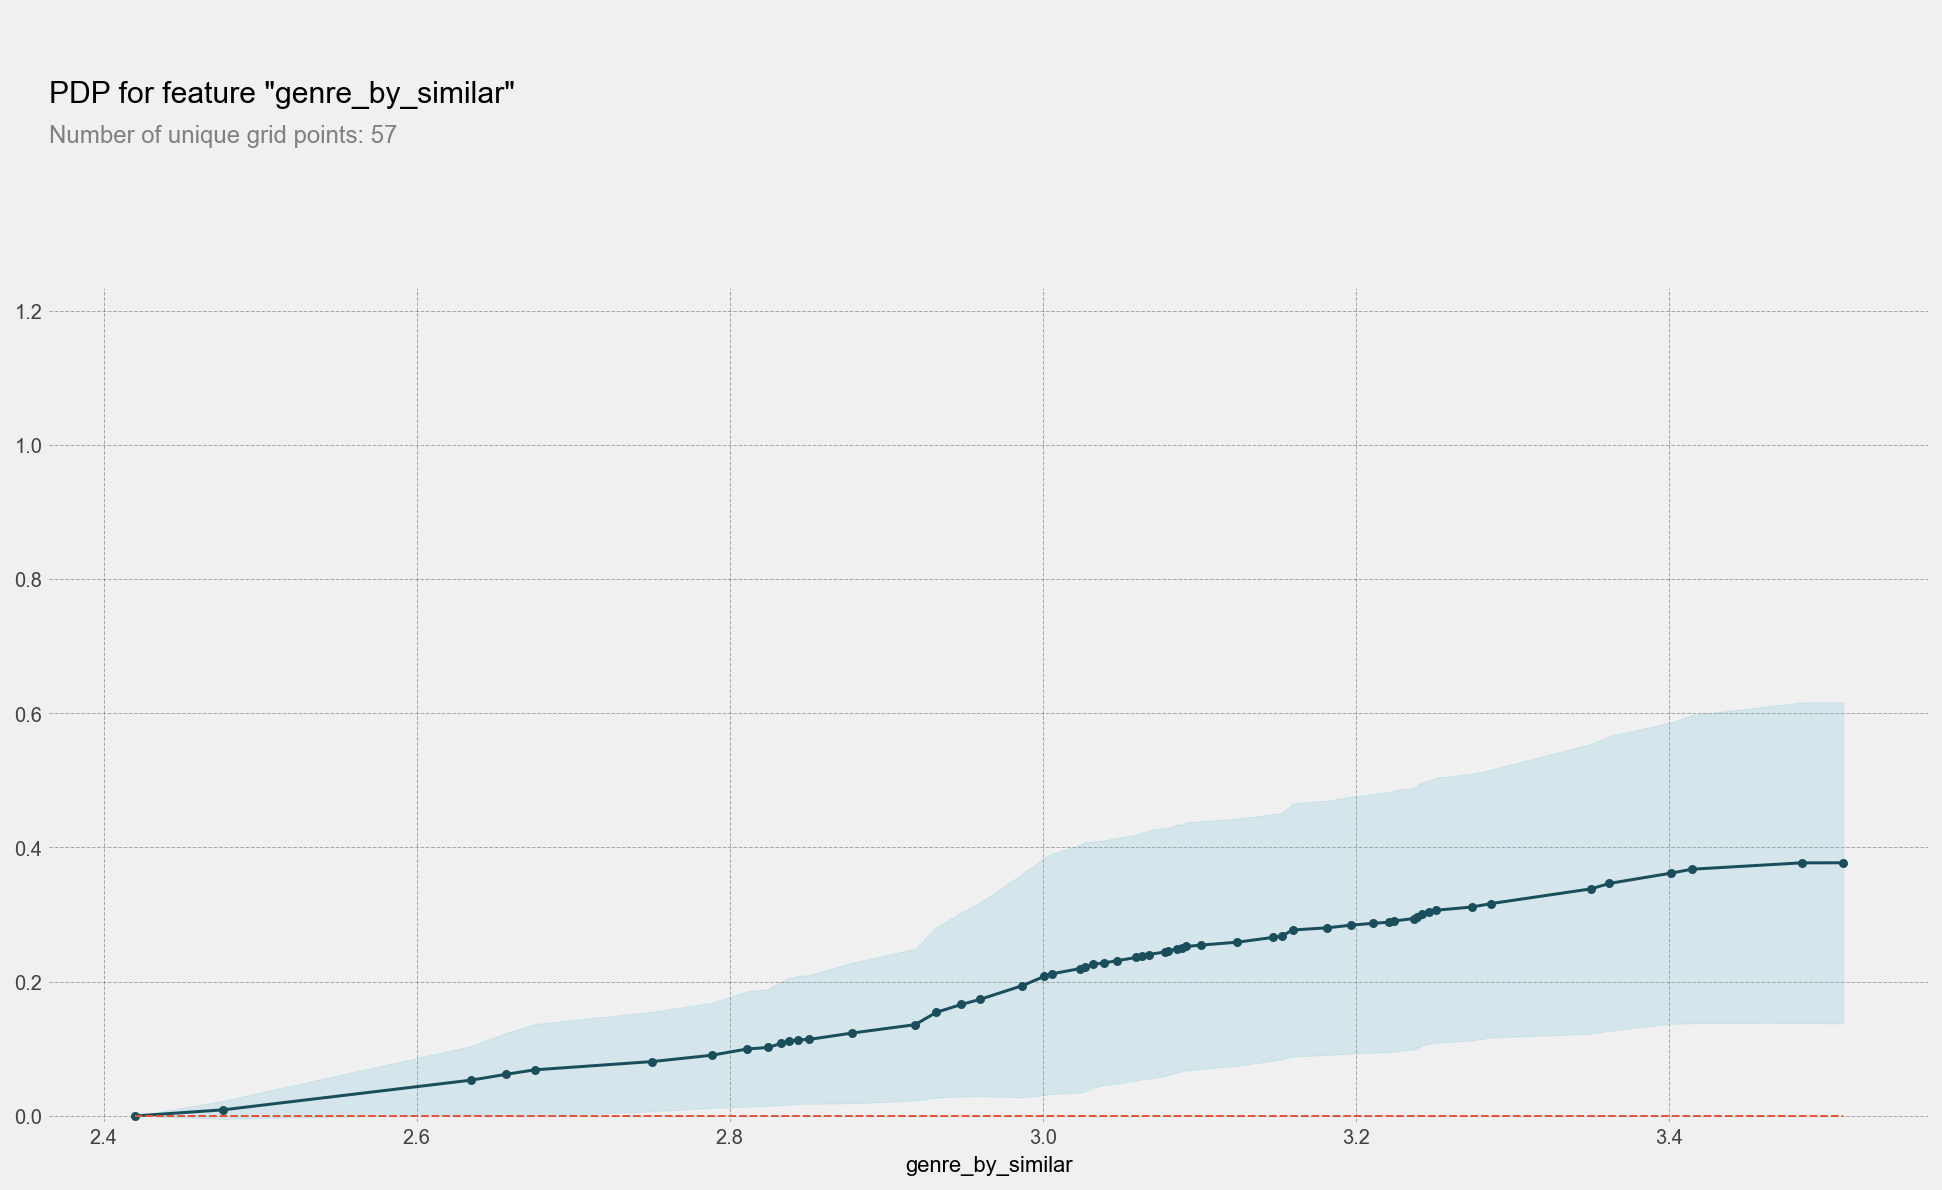

In [133]:
# pdp_plot(isolated, feature_name=feature);
feature = 'genre_by_similar'
for item in encoder.ordinal_encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping'] # Series

feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()
pdp_plot(isolated, feature)
# plt.xticks(category_codes[:10], category_names[:10]);

# baseline 모델 선형회귀


## 선형모델

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [204]:
linear = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(),SimpleImputer())),
    ('linearregression', LinearRegression()) ]
)


linear.fit(X_train, y_train)
print('R^2 train', linear.score(X_train, y_train))
print('R^2 val', linear.score(X_val, y_val))

y_pred = linear.predict(X_val)
msle = mean_squared_log_error(y_val, y_pred)**0.5
mae = mean_absolute_error(y_val, y_pred)
print(f'val MSLE:{msle}, MAE: {mae}')

R^2 train 0.43533684619222046
R^2 val 0.16751688909393714
val MSLE:0.1835992550453684, MAE: 0.46871577910656836


In [205]:
coefficients = linear.named_steps['linearregression'].coef_
coef = pd.Series(coefficients, X_val.columns).sort_values().reset_index().rename({'index':'feature',0:'coefficient'},axis=1)
coef['abs'] = coef['coefficient'].abs()

In [206]:
coef.sort_values(by='abs', ascending=False)

,feature,coefficient,abs
24,actor_power,49307658075.402,49307658075.402
0,actor_1_score,-16435886025.135,16435886025.135
1,actor_2_score,-16435886025.135,16435886025.135
2,actor_3_score,-16435886025.135,16435886025.135
23,genre_by_similar,0.552,0.552
22,Producer,0.526,0.526
21,actor_3_name,0.525,0.525
20,actor_1_name,0.515,0.515
19,actor_2_name,0.503,0.503
18,original_language,0.248,0.248
